In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [15]:
df1 = pd.read_csv('cardio_alco.csv')

In [16]:
df1.head(5)

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id;alco  56903 non-null  object
dtypes: object(1)
memory usage: 444.7+ KB


In [18]:
df1.describe()

,id;alco
count,56903
unique,56903
top,44;0
freq,1


In [19]:
# Split the 'id;alco' column into two columns
df1[['id', 'alco']] = df1['id;alco'].str.split(';', expand=True)


In [20]:
df1.head(5)

,id;alco,id,alco
0,44;0,44,0
1,45;0,45,0
2,46;0,46,0
3,47;0,47,0
4,49;0,49,0


In [21]:
# Drop the original 'id;alco' column
df1 = df1.drop(columns=['id;alco'])

In [24]:
df1.head(5)

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      56903 non-null  object
 1   alco    56903 non-null  object
dtypes: object(2)
memory usage: 889.2+ KB


In [48]:
# Convert 'id' and 'alco' columns to int
df1['id'] = df1['id'].astype(int)
df1['alco'] = df1['alco'].astype(int)


In [22]:
df2 = pd.read_csv('cardio_base.csv')

In [23]:
df2.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [26]:
df2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [35]:
df2['age'] = round(df2['age'] / 365,0)


# Group by 'age' and calculate the average weight for each age group
average_weight_by_age = df2.groupby('age')['weight'].mean()

print(max(average_weight_by_age))
print(min(average_weight_by_age))

# Identify the age group with the highest and lowest average weight
age_highest_weight = average_weight_by_age.idxmax()
age_lowest_weight = average_weight_by_age.idxmin()

# Calculate the average weight for the highest and lowest weight age groups
average_weight_highest = average_weight_by_age[age_highest_weight]
average_weight_lowest = average_weight_by_age[age_lowest_weight]

# Calculate the percentage difference in average weight
percentage_difference = ((average_weight_highest - average_weight_lowest) / average_weight_lowest) * 100

print(f"The age group with the highest average weight ({age_highest_weight}) is {percentage_difference:.2f}% heavier than the age group with the lowest weight ({age_lowest_weight}).")

75.4125
67.25
The age group with the highest average weight (64.0) is 12.14% heavier than the age group with the lowest weight (30.0).


In [36]:
df2.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50.0,2,168,62.0,110,80,1,0
1,1,55.0,1,156,85.0,140,90,3,0
2,2,52.0,1,165,64.0,130,70,3,0
3,3,48.0,2,169,82.0,150,100,1,0
4,4,48.0,1,156,56.0,100,60,1,0


In [38]:
# Assuming your data is stored in a DataFrame named 'df2'
# If not, you can create a DataFrame using the provided data

# Split the dataframe into two groups: above 50 and below or equal to 50
above_50 = df2[df2['age'] > 50]
below_or_equal_50 = df2[df2['age'] <= 50]

# Calculate the average cholesterol for each group
average_cholesterol_above_50 = above_50['cholesterol'].mean()
average_cholesterol_below_50 = below_or_equal_50['cholesterol'].mean()

# Calculate the percentage difference in average cholesterol
percentage_difference = ((average_cholesterol_above_50 - average_cholesterol_below_50) / average_cholesterol_below_50) * 100

print(f"The average cholesterol for people above 50 is {percentage_difference:.2f}% higher than the average cholesterol for those below or equal to 50.")

The average cholesterol for people above 50 is 14.66% higher than the average cholesterol for those below or equal to 50.


In [39]:
# Group by 'gender' and calculate the percentage of smokers in each group
smoker_percentage_by_gender = df2.groupby('gender')['smoke'].mean() * 100

# Compare the percentage of smokers between men (gender=2) and women (gender=1)
if smoker_percentage_by_gender[2] > smoker_percentage_by_gender[1]:
    print("Men are more likely to be smokers than women.")
elif smoker_percentage_by_gender[2] < smoker_percentage_by_gender[1]:
    print("Women are more likely to be smokers than men.")
else:
    print("The percentage of smokers is the same for men and women.")

Men are more likely to be smokers than women.


In [40]:
# Group by 'gender' and calculate the smoking rate for each group
smoking_rate_by_gender = df2.groupby('gender')['smoke'].mean()

# Calculate the ratio of smoking rates (men / women)
smoking_ratio = smoking_rate_by_gender[2] / smoking_rate_by_gender[1]

print(f"Men are {smoking_ratio:.2f} times more likely to be smokers than women.")

Men are 12.26 times more likely to be smokers than women.


In [41]:
# Calculate the height value at the 99th percentile (1% of people are taller)
tallest_1_percent_height = df2['height'].quantile(0.99)

print(f"The height of the tallest 1% of people is {tallest_1_percent_height:.2f} units.")

The height of the tallest 1% of people is 184.00 units.


In [44]:
# Assuming your data is stored in a DataFrame named 'df2'
# If not, you can create a DataFrame using the provided data

# Exclude the 'id' column from the DataFrame
df2_no_id = df2.drop(columns=['id'])

# Calculate the Spearman rank correlation matrix
spearman_corr_matrix = df2_no_id.corr(method='spearman')

# Find the pair of non-identical features with the highest Spearman rank correlation
max_corr_pair = None
max_corr_value = 0

for feature1 in spearman_corr_matrix.columns:
    for feature2 in spearman_corr_matrix.columns:
        if feature1 != feature2:
            current_corr = spearman_corr_matrix.loc[feature1, feature2]
            if abs(current_corr) > abs(max_corr_value):
                max_corr_pair = (feature1, feature2)
                max_corr_value = current_corr

# Extract the feature names from the pair
feature1, feature2 = max_corr_pair

print(f"The two non-identical features with the highest Spearman rank correlation are '{feature1}' and '{feature2}' with a correlation coefficient of {max_corr_value:.2f}.")

The two non-identical features with the highest Spearman rank correlation are 'ap_hi' and 'ap_lo' with a correlation coefficient of 0.74.


In [45]:
# Calculate the average and standard deviation of the 'height' column
average_height = df2['height'].mean()
std_dev_height = df2['height'].std()

# Define the threshold (2 standard deviations away from the average)
threshold = 2 * std_dev_height

# Count the number of people more than 2 standard deviations away from the average height
count_above_threshold = np.sum(np.abs(df2['height'] - average_height) > threshold)

# Calculate the percentage
percentage_above_threshold = (count_above_threshold / len(df2)) * 100

print(f"{percentage_above_threshold:.2f}% of people are more than 2 standard deviations away from the average height.")

3.34% of people are more than 2 standard deviations away from the average height.


In [ ]:
#

In [49]:
# Merge df2 and df1 on 'id', excluding rows without alcohol consumption information
merged_df = pd.merge(df2, df1, how='inner', on='id')



          id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  \
0         44  40.0       1     159    60.0    110     70            1      0   
1         45  57.0       1     160    73.0    130     85            1      0   
2         46  60.0       2     173    82.0    140     90            3      0   
3         47  56.0       1     163    55.0    120     80            1      0   
4         49  50.0       2     175    95.0    120     80            1      0   
...      ...   ...     ...     ...     ...    ...    ...          ...    ...   
56898  99949  58.0       1     178    69.0    130     90            1      0   
56899  99950  54.0       2     155    76.0    130     90            1      0   
56900  99951  62.0       2     170    72.0    120     80            1      0   
56901  99952  42.0       2     165    66.0    120     80            1      0   
56902  99954  56.0       1     156    67.0    140     80            2      0   

       alco  
0         0  
1         0

In [50]:
merged_df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40.0,1,159,60.0,110,70,1,0,0
1,45,57.0,1,160,73.0,130,85,1,0,0
2,46,60.0,2,173,82.0,140,90,3,0,0
3,47,56.0,1,163,55.0,120,80,1,0,0
4,49,50.0,2,175,95.0,120,80,1,0,0


In [51]:
# Filter individuals over 50
over_50_df = merged_df[merged_df['age'] > 50]

# Calculate the percentage of the population over 50 that consumes alcohol
percentage_over_50_with_alcohol = (over_50_df['alco'].sum() / len(over_50_df)) * 100

print(f"{percentage_over_50_with_alcohol:.2f}% of the population over 50 years old consumes alcohol.")

4.93% of the population over 50 years old consumes alcohol.


In [52]:
# Calculate the average blood pressure for smokers
average_bp_smokers = merged_df[merged_df['smoke'] == 1][['ap_hi', 'ap_lo']].mean()

# Calculate the average blood pressure for non-smokers
average_bp_non_smokers = merged_df[merged_df['smoke'] == 0][['ap_hi', 'ap_lo']].mean()

print("Average Blood Pressure for Smokers:")
print(average_bp_smokers)

print("\nAverage Blood Pressure for Non-Smokers:")
print(average_bp_non_smokers)

Average Blood Pressure for Smokers:
ap_hi    128.278230
ap_lo     97.999802
dtype: float64

Average Blood Pressure for Non-Smokers:
ap_hi    129.072767
ap_lo     96.631151
dtype: float64


In [53]:
# Calculate the average cholesterol for smokers
average_cholesterol_smokers = merged_df[merged_df['smoke'] == 1]['cholesterol'].mean()

# Calculate the average cholesterol for non-smokers
average_cholesterol_non_smokers = merged_df[merged_df['smoke'] == 0]['cholesterol'].mean()

print("Average Cholesterol Level for Smokers:", average_cholesterol_smokers)
print("Average Cholesterol Level for Non-Smokers:", average_cholesterol_non_smokers)

Average Cholesterol Level for Smokers: 1.3905536812859693
Average Cholesterol Level for Non-Smokers: 1.3656679006632733


In [54]:
# Calculate the average weight for smokers
average_weight_smokers = merged_df[merged_df['smoke'] == 1]['weight'].mean()

# Calculate the average weight for non-smokers
average_weight_non_smokers = merged_df[merged_df['smoke'] == 0]['weight'].mean()

print("Average Weight for Smokers:", average_weight_smokers)
print("Average Weight for Non-Smokers:", average_weight_non_smokers)

Average Weight for Smokers: 77.35614209168486
Average Weight for Non-Smokers: 73.8532893722042


In [55]:
# Calculate the average blood pressure for men
average_bp_men = merged_df[merged_df['gender'] == 2][['ap_hi', 'ap_lo']].mean()

# Calculate the average blood pressure for women
average_bp_women = merged_df[merged_df['gender'] == 1][['ap_hi', 'ap_lo']].mean()

print("Average Blood Pressure for Men:")
print(average_bp_men)

print("\nAverage Blood Pressure for Women:")
print(average_bp_women)

Average Blood Pressure for Men:
ap_hi    130.422672
ap_lo     99.508570
dtype: float64

Average Blood Pressure for Women:
ap_hi    128.235406
ap_lo     95.263877
dtype: float64


In [98]:
df3 = pd.read_csv("covid_data.csv")

In [99]:
df3.head(5)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [101]:
# Convert 'date' column to datetime type
df3['date'] = pd.to_datetime(df3['date'])

In [102]:
# Filter data for Italy and Germany
italy_data = df3[df3['location'] == 'Italy']
germany_data = df3[df3['location'] == 'Germany']

# Merge the data on 'date'
merged_data = pd.merge(italy_data, germany_data, on='date', suffixes=('_italy', '_germany'))

# Calculate the difference in confirmed cases
merged_data['confirmed_cases_diff'] = merged_data['new_cases_italy'].cumsum() - merged_data['new_cases_germany'].cumsum()

# Find the date when the difference became more than 10,000
date_threshold_exceeded = merged_data.loc[merged_data['confirmed_cases_diff'] > 10000, 'date'].min()

print(f"The date when the difference in total confirmed cases between Italy and Germany became more than 10,000 is: {date_threshold_exceeded}")

The date when the difference in total confirmed cases between Italy and Germany became more than 10,000 is: 2020-03-12 00:00:00


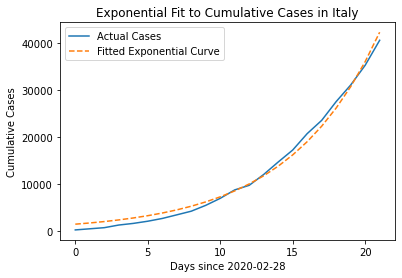

Difference between the exponential curve and actual cases on 2020-03-20: 37024.69


In [103]:
from scipy.optimize import curve_fit

# Assuming df3 is your DataFrame
# If not, you can create a DataFrame using the provided data

# Filter data for Italy between 2020-02-28 and 2020-03-20
italy_data = df3[(df3['location'] == 'Italy') & (df3['date'] >= '2020-02-28') & (df3['date'] <= '2020-03-20')]

# Extract relevant columns
dates = np.arange(len(italy_data))
cases = italy_data['new_cases'].cumsum()

# Define the exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential function to the data
params, covariance = curve_fit(exponential_func, dates, cases)

# Generate the exponential curve
fitted_curve = exponential_func(dates, *params)

# Plot the actual data and the fitted curve
plt.plot(dates, cases, label='Actual Cases')
plt.plot(dates, fitted_curve, label='Fitted Exponential Curve', linestyle='--')
plt.xlabel('Days since 2020-02-28')
plt.ylabel('Cumulative Cases')
plt.title('Exponential Fit to Cumulative Cases in Italy')
plt.legend()
plt.show()

# Calculate the difference between the exponential curve and actual cases on 2020-03-20
days_passed_on_2020_03_20 = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
actual_cases_on_2020_03_20 = italy_data[italy_data['date'] == '2020-03-20']['new_cases'].cumsum().values[0]
fitted_cases_on_2020_03_20 = exponential_func(days_passed_on_2020_03_20, *params)

difference_on_2020_03_20 = fitted_cases_on_2020_03_20 - actual_cases_on_2020_03_20

print(f"Difference between the exponential curve and actual cases on 2020-03-20: {difference_on_2020_03_20:.2f}")

In [104]:
# Calculate death rate (deaths per million inhabitants) for each country
death_rates = df3.groupby('location')['new_deaths'].sum() / df3.groupby('location')['population'].max() * 1_000_000

# Sort countries by death rate in descending order
sorted_countries = death_rates.sort_values(ascending=False)

# Get the third country in the sorted list
third_highest_death_rate_country = sorted_countries.index[2]

print(f"The country with the third-highest death rate is: {third_highest_death_rate_country}")

The country with the third-highest death rate is: Andorra


In [105]:
df3.head(5)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [106]:
# Remove the date column
df3 = df3.drop('date', axis=1)

# Take the sum and first value for relevant columns
result = df3.groupby('location').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'population': 'first',
    'aged_65_older_percent': 'first',
    'gdp_per_capita': 'first',
    'hospital_beds_per_thousand': 'first'
}).reset_index()

# Display the result
print(result)

           location  new_cases  new_deaths    population  \
0       Afghanistan      21459         384  3.892834e+07   
1           Albania       1299          34  2.877800e+06   
2           Algeria      10382         724  4.385104e+07   
3           Andorra        852          51  7.726500e+04   
4            Angola         96           4  3.286627e+07   
..              ...        ...         ...           ...   
207  Western Sahara         23           1  5.973300e+05   
208           World    7210462      411195  7.794799e+09   
209           Yemen        524         127  2.982597e+07   
210          Zambia       1200          10  1.838396e+07   
211        Zimbabwe        314           4  1.486293e+07   

     aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                    2.581        1803.987                       0.500  
1                   13.188       11803.431                       2.890  
2                    6.211       13913.839                  

In [107]:
result['death_rate'] = result['new_deaths'] / result['population'] * 100000

In [108]:
result.head(5)

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
0,Afghanistan,21459,384,38928341.0,2.581,1803.987,0.50,0.986428
1,Albania,1299,34,2877800.0,13.188,11803.431,2.89,1.181458
2,Algeria,10382,724,43851043.0,6.211,13913.839,1.90,1.651044
3,Andorra,852,51,77265.0,NaN,NaN,NaN,66.006601
4,Angola,96,4,32866268.0,2.405,5819.495,NaN,0.012171


In [109]:
# Filter countries with 20% or more of the population over 65 and remove NaN values
filtered_result = result[(result['aged_65_older_percent'] >= 20) & (~result['aged_65_older_percent'].isna())]

# Display the filtered DataFrame
print(filtered_result)

     location  new_cases  new_deaths   population  aged_65_older_percent  \
30   Bulgaria       2889         167    6948445.0                 20.801   
67    Finland       7025         324    5540718.0                 21.228   
73    Germany     184861        8729   83783945.0                 21.453   
76     Greece       3058         183   10423056.0                 20.396   
98      Italy     235561       34043   60461828.0                 23.021   
100     Japan      17251         919  126476458.0                 27.049   
154  Portugal      35306        1492   10196707.0                 21.502   

     gdp_per_capita  hospital_beds_per_thousand  death_rate  
30        18563.307                       7.454    2.403415  
67        40585.721                       3.280    5.847618  
73        45229.245                       8.000   10.418464  
76        24574.382                       4.210    1.755723  
98        35220.084                       3.180   56.304947  
100       39002.223

In [110]:
# Add a new column with 1 if death rate is over 50, else 0
filtered_result['high_death_rate'] = (filtered_result['death_rate'] > 50).astype(int)

# Display the DataFrame with the new column
print(filtered_result)

     location  new_cases  new_deaths   population  aged_65_older_percent  \
30   Bulgaria       2889         167    6948445.0                 20.801   
67    Finland       7025         324    5540718.0                 21.228   
73    Germany     184861        8729   83783945.0                 21.453   
76     Greece       3058         183   10423056.0                 20.396   
98      Italy     235561       34043   60461828.0                 23.021   
100     Japan      17251         919  126476458.0                 27.049   
154  Portugal      35306        1492   10196707.0                 21.502   

     gdp_per_capita  hospital_beds_per_thousand  death_rate  high_death_rate  
30        18563.307                       7.454    2.403415                0  
67        40585.721                       3.280    5.847618                0  
73        45229.245                       8.000   10.418464                0  
76        24574.382                       4.210    1.755723                

In [111]:
# Add a new column named 'high_death_rate_predict' with constant value 1
filtered_result['high_death_rate_predict'] = 1

In [112]:
filtered_result.head(5)

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate,high_death_rate,high_death_rate_predict
30,Bulgaria,2889,167,6948445.0,20.801,18563.307,7.454,2.403415,0,1
67,Finland,7025,324,5540718.0,21.228,40585.721,3.280,5.847618,0,1
73,Germany,184861,8729,83783945.0,21.453,45229.245,8.000,10.418464,0,1
76,Greece,3058,183,10423056.0,20.396,24574.382,4.210,1.755723,0,1
98,Italy,235561,34043,60461828.0,23.021,35220.084,3.180,56.304947,1,1


In [114]:
from sklearn.metrics import f1_score

# Assuming filtered_result is your DataFrame
# If not, you can create a DataFrame using the provided data

# Calculate F1 score
f1 = f1_score( filtered_result['high_death_rate_predict'], filtered_result['high_death_rate'])

# Display the F1 score
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.2500


In [115]:
# Replace values in the 'high_death_rate_predict' column with all 0s
filtered_result['high_death_rate_predict'] = 0

In [116]:
# Calculate F1 score
f1 = f1_score( filtered_result['high_death_rate_predict'], filtered_result['high_death_rate'])

# Display the F1 score
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.0000


In [117]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    212 non-null    object 
 1   new_cases                   212 non-null    int64  
 2   new_deaths                  212 non-null    int64  
 3   population                  211 non-null    float64
 4   aged_65_older_percent       184 non-null    float64
 5   gdp_per_capita              184 non-null    float64
 6   hospital_beds_per_thousand  165 non-null    float64
 7   death_rate                  211 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 13.4+ KB


In [118]:
result.head(10)

,location,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
0,Afghanistan,21459,384,38928341.0,2.581,1803.987,0.50,0.986428
1,Albania,1299,34,2877800.0,13.188,11803.431,2.89,1.181458
2,Algeria,10382,724,43851043.0,6.211,13913.839,1.90,1.651044
3,Andorra,852,51,77265.0,NaN,NaN,NaN,66.006601
4,Angola,96,4,32866268.0,2.405,5819.495,NaN,0.012171
5,Anguilla,3,0,15002.0,NaN,NaN,NaN,0.000000
6,Antigua and Barbuda,26,3,97928.0,6.933,21490.943,3.80,3.063475
7,Argentina,24748,717,45195777.0,11.198,18933.907,5.00,1.586431
8,Armenia,13675,217,2963234.0,11.232,8787.580,4.20,7.323080
9,Aruba,101,3,106766.0,13.085,35973.781,NaN,2.809883


In [120]:
# Remove rows with NaN or blank values in 'gdp_per_capita' and 'hospital_beds_per_thousand' columns
cleaned_data = result.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'], how='any')

# Filter the cleaned DataFrame for countries with at least 5 hospital beds per 1000 inhabitants
filtered_data = cleaned_data[cleaned_data['hospital_beds_per_thousand'] >= 5]

# Calculate the probability of having a GDP over $10,000 given the filter
probability = filtered_data[filtered_data['gdp_per_capita'] > 10000].shape[0] / filtered_data.shape[0]

# Display the probability
print(f"Probability of GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants: {probability:.4f}")

Probability of GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants: 0.8846
